# Identification of a Pareto Front

When considering optimisation of multiple objectives, the Pareto front is that collection of points where one objective cannot be improved without detriment to another objective. These points are also called ‘non-dominated’. In contrast, points not on the Pareto front, or ‘dominated’ points represents points where it is possible to improve one or more objectives without loss of performance of another objective.

An example of this type of problem is the planning of emergency department (ED) services. Ideally we all like to be close to an ED, but we also want that ED to be large enough to sustained 24/7 consultant physician presence. So we might for example have two objectives: the proportion of patients living with 30 minutes of an ED, and the proportion of patients who attend an ED with 24/7 consultant presence. The more EDs we have in England the more patients will be within 30 minutes of one, but as we plan for more EDs those EDs get smaller and fewer will be able to sustain 24/7 consultant presence. We may be interested in seeing the nature of the trade-off. We therefore explore lots of potential solutions (i.e. change the number and location of ED departments) and we identify the Pareto frontier.

Here we present code to identify points on the Pareto front. We will use an example with just two objectives (as that is easy to visualise) but the Pareto front principle works for any number of simultaneous objectives.

In [1]:
function identify_pareto(scores)
    #=
    Identifies points on the Pareto front.
    
    input
    -----
    An array of arrays. Each sub-array is a vector of feaures values (any
    number of features, though all candidate poinst must have the same number of
    features).
    
    It is asuumed that the features have been transformed (if necessary) such
    greater values are better. A simple tranformation if lower values are better
    is to transpose those features by 1/x before passing to the pareto function.
    
    returns
    -------
    An array of index values of those points on the Pareto Front.    
    =#
    
    # Count items
    population_size = size(scores)[1]
    # All items start off as being labelled as on the Pareto front
    pareto_front = ones(population_size)
    # Loop through each item. This will then be compared with all other items
    for i in 1:population_size
        # Loop through all other items
        for j in 1:population_size
            # Check if our 'i' point is dominated by out 'j' point
            if all(scores[j] .>= scores[i]) && any(scores[j] .> scores[i])
                # # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
            end
        end
    end
    # Get index of Pareto front points
    pareto_ids = findall(x->x==1, pareto_front)
    # Return Pareto front IDs (not actuall point values)
    return pareto_ids
end    

identify_pareto (generic function with 1 method)

Set up a test array of 30 points, each with two features.

In [2]:
scores = [[97, 23], [55, 77], [34, 76], [80, 60], [99,  4], [81,  5],
          [ 5, 81], [30, 79], [15, 80], [70, 65], [90, 40], [40, 30],
          [30, 40], [20, 60], [60, 50], [20, 20], [30,  1], [60, 40],
          [70, 25], [44, 62], [55, 55], [55, 10], [15, 45], [83, 22],
          [76, 46], [56, 32], [45, 55], [10, 70], [10, 30], [79, 50]];

In [3]:
# Convert scores to matrix to get x and y (for plotting)
scores_matrix = transpose(hcat(scores...))
x = scores_matrix[:, 1]
y = scores_matrix[:, 2];

In [4]:
# Get pareto front ids
pareto_front = identify_pareto(scores)

# Get values of points on pareto front
pareto_front_values = []
for item in pareto_front
    push!(pareto_front_values, scores[item])
end

# Get x and y for Parto front points (for plotting)
x_pareto = []
y_pareto = []
for item in pareto_front_values
    push!(x_pareto, item[1])
    push!(y_pareto, item[2])
end

Plot all points with Pareto front

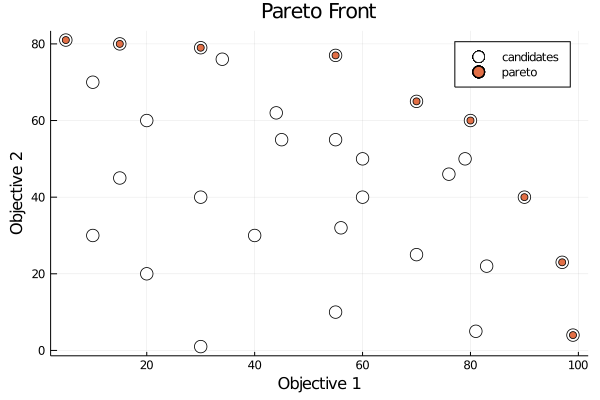

In [5]:
using Plots
scatter(x, y, label="candidates", markersize=7, markercolor="white")
scatter!(x_pareto, y_pareto, label="pareto")
# Add labels
xlabel!("Objective 1")
ylabel!("Objective 2")
title!("Pareto Front")